# Kinematic Chain

This notebook presents the tools for applying the kinematic chain designed for a rowing body model, along with functions to convert the data from pixel dimension (acquired directly from an image) to a 2 dimensional cartesian coordinate system, and vice versa. The notebook is organized in the following sections.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kinematic-Chain" data-toc-modified-id="Kinematic-Chain-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kinematic Chain</a></span><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Implemented-Functions" data-toc-modified-id="Implemented-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Implemented Functions</a></span></li><li><span><a href="#Pixel-to-millimeters-conversion" data-toc-modified-id="Pixel-to-millimeters-conversion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pixel to millimeters conversion</a></span><ul class="toc-item"><li><span><a href="#Angle-from-pixels-showed-as-an-image" data-toc-modified-id="Angle-from-pixels-showed-as-an-image-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Angle from pixels showed as an image</a></span></li><li><span><a href="#Angle-from-cartesian-coordinates-showed-graphically" data-toc-modified-id="Angle-from-cartesian-coordinates-showed-graphically-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Angle from cartesian coordinates showed graphically</a></span></li><li><span><a href="#Conversion-from-cartesian-coordinates-to-pixel-representation" data-toc-modified-id="Conversion-from-cartesian-coordinates-to-pixel-representation-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Conversion from cartesian coordinates to pixel representation</a></span></li><li><span><a href="#Conversion-from-pixel-representation-to-cartesian-coordinates" data-toc-modified-id="Conversion-from-pixel-representation-to-cartesian-coordinates-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Conversion from pixel representation to cartesian coordinates</a></span></li><li><span><a href="#-Problems" data-toc-modified-id="-Problems-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span><font color="red"> Problems</font></a></span></li></ul></li><li><span><a href="#Kinematic-Model" data-toc-modified-id="Kinematic-Model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Kinematic Model</a></span><ul class="toc-item"><li><span><a href="#Master-Motor-Map-Framework-(MMM)" data-toc-modified-id="Master-Motor-Map-Framework-(MMM)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Master Motor Map Framework (MMM)</a></span></li><li><span><a href="#Rowing-Model" data-toc-modified-id="Rowing-Model-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Rowing Model</a></span></li><li><span><a href="#-Problems" data-toc-modified-id="-Problems-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span><font color="red"> Problems</font></a></span></li><li><span><a href="#-Overall-proposal" data-toc-modified-id="-Overall-proposal-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span><font color="green"> Overall proposal</font></a></span></li></ul></li><li><span><a href="#Inverse-Kinematics" data-toc-modified-id="Inverse-Kinematics-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Inverse Kinematics</a></span><ul class="toc-item"><li><span><a href="#Set-keypoints-example" data-toc-modified-id="Set-keypoints-example-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Set keypoints example</a></span></li><li><span><a href="#Apply-inverse-kinematics-for-a-pixel-representation" data-toc-modified-id="Apply-inverse-kinematics-for-a-pixel-representation-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Apply inverse kinematics for a pixel representation</a></span></li><li><span><a href="#Apply-inverse-kinematics-for-a-cartesian-representation" data-toc-modified-id="Apply-inverse-kinematics-for-a-cartesian-representation-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Apply inverse kinematics for a cartesian representation</a></span></li></ul></li><li><span><a href="#Foward-Kinematics" data-toc-modified-id="Foward-Kinematics-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Foward Kinematics</a></span><ul class="toc-item"><li><span><a href="#Show-bone-dimensions-from-starting-pose" data-toc-modified-id="Show-bone-dimensions-from-starting-pose-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Show bone dimensions from starting pose</a></span></li><li><span><a href="#Show-angles-and-distances-graphically" data-toc-modified-id="Show-angles-and-distances-graphically-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Show angles and distances graphically</a></span></li><li><span><a href="#Set-angles-example" data-toc-modified-id="Set-angles-example-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Set angles example</a></span></li></ul></li></ul></li></ul></div>

## Dependencies

All the libraries used in this notebook are:

- Opencv 3 (optional script for linux OS: [opencv_script_linux](https://github.com/milq/milq/blob/master/s/bash/install-opencv.sh); scripts for other OS: [opencv_script_others](https://github.com/spmallick/learnopencv/tree/master/InstallScripts))
- Numpy (pip install numpy)
- Matplotlib (pip install matplotlib)
- Math (native I think)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

## Implemented Functions

List of all the functions used in the notebook. 

<font color="red">Tip: in order to see the function structure from any cell, just type and execute:</font>
    
<font color="red">??nameOfTheFunction</font>

In [7]:
def getPointsDistance(A, B):
    distance = np.sqrt(np.sum(np.power((A - B),2)))
    return distance
                      
def getBoneDimensions(keypoints_xy):
    """ Expected joint order
    if orientation == "Sagittal Right":
        joints_order = ["Right Ankle", "Right Knee", "Right Hip", "Right Shoulder", "Right Elbow", "Right Wrist"]
    else:
        joints_order = ["Left Ankle", "Left Knee", "Left Hip", "Left Shoulder", "Left Elbow", "Left Wrist"]
    """
    distances = np.zeros(5)
    for i in range(5):
        distances[i] = getPointsDistance(keypoints_xy[i], keypoints_xy[i+1])
    return distances

def getPixel(coord_xy, f_height, mmppx=1, mmppy=1):
    j = int(round(coord_xy[0]/mmppx))
    i = int(round(f_height - (coord_xy[1]/mmppy)))
    return np.array([j, i])

def getCoord(pixel_ji, f_height, mmppx=1, mmppy=1):
    x = pixel_ji[0]*mmppx
    y = (f_height - pixel_ji[1])*mmppy
    return np.array([x, y])

def getKeypointsPixels(keypoints_xy, f_height, mmppx=1, mmppy=1):
    keypoints_ji = np.zeros(keypoints_xy.shape)
    for i in range(len(keypoints)):
        keypoints_ji[i] = list(getPixel(keypoints_xy[i], f_height, mmppx, mmppy))
    return keypoints_ji

def getKeypointsCoord(keypoints_ji, f_height, mmppx=1, mmppy=1):
    keypoints_xy = np.zeros(keypoints_ji.shape)
    for i in range(len(keypoints)):
        keypoints_xy[i] = list(getCoord(keypoints_ji[i], f_height, mmppx, mmppy))
    return keypoints_xy

def showFrame(frame):
    plt.figure(figsize=[9,6])
    plt.imshow(frame[:,:,[2,1,0]])
    plt.axis("off")
    plt.show()

def drawCircle(img, coord, thickness=5):
    coord = tuple(coord.astype(int))
    cv2.circle(img, coord, thickness, (0,0,1), -1)
    return img

def drawLine(img, A, B, color = (0,0,0), thickness = 2):
    A = tuple(A.astype(int))
    B = tuple(B.astype(int))
    cv2.line(img, A, B, color,thickness)
    return img

def getAngle(A, B, O):
    ang = math.degrees(math.atan2(B[1]-O[1], B[0]-O[0]) - math.atan2(A[1]-O[1], A[0]-O[0]))
    return ang

def getAngleLimited(A, B, O, allow_neg=True):
    if allow_neg:
        try:
            ang = math.degrees(math.atan2(B[1]-O[1], B[0]-O[0]) - math.atan2(A[1]-O[1], A[0]-O[0]))
#             if ang < 0:
#                 ang += 360
            if ang > 180:
                ang = 360 - ang
        except:
            ang = 0
    else:
        try:
            ang = math.degrees(math.atan2(B[1]-O[1], B[0]-O[0]) - math.atan2(A[1]-O[1], A[0]-O[0]))
            if ang < 0:
                ang += 360
            if ang > 180:
                ang = 360 - ang
        except:
            ang = 0
    return ang

def drawAngle(img, O, angle, thickness=10, textsize=1):
    O = tuple(O.astype(int))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.circle(img, O, thickness, (1,0.8,0.8), -1)
    cv2.putText(img,str(int(round(angle))),(O[0]-round(thickness/2),O[1]-round(thickness/2)), font, textsize,(1,0,0),2,cv2.LINE_AA)
    return img

def showAngleImage(frame, A, B, O):
    frame = drawLine(frame, A, O)
    frame = drawLine(frame, O, B)
    frame = drawCircle(frame, A)
    frame = drawCircle(frame, B)
    frame = drawCircle(frame, O)
    angle = getAngleLimited(A, B, O)
    frame = drawAngle(frame, O, angle)
    showFrame(frame)

def showAnglePlot(A, B, O):
    angle = getAngleLimited(A, B, O)
    plt.figure()
    plt.plot([A[0], O[0]], [A[1], O[1]], 'ro-')
    plt.plot([O[0], B[0]], [O[1], B[1]], 'ro-')
    plt.text(O[0], O[1], "{}".format(round(angle)), bbox=dict(facecolor='red', alpha=0.5))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()

def showJointsImage(frame, keypoints_ji, joint_pairs, thickness=5, textsize=0.8):
#     joint_names_abv = ["RA", "RK", "RH", "RS", "RE", "RW"]
#     i = 0
    for pair in joint_pairs:
        A = keypoints_ji[pair[0]]
        B = keypoints_ji[pair[1]]
        frame = drawLine(frame, A, B)
        frame = drawCircle(frame, A)
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(frame,joint_names_abv[i],(int(A[0]-round(thickness/2)),int(A[1]-round(thickness/2))), font, textsize,(0,0,1),2,cv2.LINE_AA)
#         i+=1
    showFrame(frame)
    
def showJointsPlot(keypoints_xy, joint_pairs):
    plt.figure()
    for pair in joint_pairs:
        A = keypoints_xy[pair[0]]
        B = keypoints_xy[pair[1]]
        plt.plot([A[0], B[0]], [A[1], B[1]], 'ro-', color = "black")
        circle1 = plt.Circle((A[0], A[1]), 1, color='r')
        plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()

def inverseKinematicsRowing(keypoints, pose_model='SR'):
    """ Expected joint order
    if orientation == "Sagittal Right":
        joints_order = ["Right Ankle", "Right Knee", "Right Hip", "Right Shoulder", "Right Elbow", "Right Wrist"]
    else:
        joints_order = ["Left Ankle", "Left Knee", "Left Hip", "Left Shoulder", "Left Elbow", "Left Wrist"]
    """
    angles = np.zeros(5)
    for i in range(5):
        if i == 0:
            O = keypoints[i]
            B = keypoints[i+1]
            C = keypoints[i+2]
            A = np.array([C[0], O[1]])
        else:
            A = keypoints[i-1]
            O = keypoints[i]
            B = keypoints[i+1]
        
        if i==3:
            angles[i] = getAngle(A, B, O)
        else:
            angles[i] = getAngleLimited(A, B, O)
    return angles

def fowardKinematicsRowing(root_xy, angles, distances, orientation = "Sagittal Left"):
    keypointsFK_xy = np.zeros([6, 2])
    keypointsFK_xy[0] = root_xy
    if orientation == "Sagittal Left":
        sign = 1
    else:
        sign = -1
    for i in range (1, 6):
        if i == 1:
            arg = math.radians(angles[i-1])
            keypointsFK_xy[i, 0] = keypointsFK_xy[i-1, 0] - (sign)*distances[i-1]*math.cos(arg)
            keypointsFK_xy[i, 1] = keypointsFK_xy[i-1, 1] + distances[i-1]*math.sin(arg)
        elif i == 2:
            arg = math.pi - arg - math.radians(angles[i-1])
            keypointsFK_xy[i, 0] = keypointsFK_xy[i-1, 0] - (sign)*distances[i-1]*math.cos(arg)
            keypointsFK_xy[i, 1] = keypointsFK_xy[i-1, 1] - distances[i-1]*math.sin(arg)
        elif i == 3:
            #arg = arg - math.radians(angles[i-1])
            arg = math.pi - arg - math.radians(angles[i-1])
            keypointsFK_xy[i, 0] = keypointsFK_xy[i-1, 0] - (sign)*distances[i-1]*math.cos(arg)
            keypointsFK_xy[i, 1] = keypointsFK_xy[i-1, 1] + distances[i-1]*math.sin(arg)
        elif i == 4:
            #arg = math.pi - arg - math.radians(angles[i-1])
            arg = arg - math.radians(angles[i-1])
            keypointsFK_xy[i, 0] = keypointsFK_xy[i-1, 0] + (sign)*distances[i-1]*math.cos(arg)
            keypointsFK_xy[i, 1] = keypointsFK_xy[i-1, 1] - distances[i-1]*math.sin(arg)
        elif i == 5:
            arg = math.pi - arg - math.radians(angles[i-1])
            keypointsFK_xy[i, 0] = keypointsFK_xy[i-1, 0] + (sign)*distances[i-1]*math.cos(arg)
            keypointsFK_xy[i, 1] = keypointsFK_xy[i-1, 1] + distances[i-1]*math.sin(arg)
            
    return keypointsFK_xy

def showRowingChainAnglesImage(frame, keypoints_ji, textsize=0.5):
    """ Expected joint order
    if orientation == "Sagittal Right":
        joints_order = ["Right Ankle", "Right Knee", "Right Hip", "Right Shoulder", "Right Elbow", "Right Wrist"]
    else:
        joints_order = ["Left Ankle", "Left Knee", "Left Hip", "Left Shoulder", "Left Elbow", "Left Wrist"]
    """    
    angles = inverseKinematicsRowing(keypoints_ji)
    for i in range(5):
        O = keypoints_ji[i]
        B = keypoints_ji[i+1]       
        frame = drawLine(frame, O, B)
        frame = drawAngle(frame, O, angles[i], 5, textsize)
        
    showFrame(frame)
    
def showRowingChainAnglesPlot(keypoints_xy): 
    """ Expected joint order
    if orientation == "Sagittal Right":
        joints_order = ["Right Ankle", "Right Knee", "Right Hip", "Right Shoulder", "Right Elbow", "Right Wrist"]
    else:
        joints_order = ["Left Ankle", "Left Knee", "Left Hip", "Left Shoulder", "Left Elbow", "Left Wrist"]
    """    
    angles = inverseKinematicsRowing(keypoints_xy)
    
    plt.figure()
    for i in range(5):
        O = keypoints_xy[i]
        B = keypoints_xy[i+1]          
        plt.plot([O[0], B[0]], [O[1], B[1]], 'ro-', color = "black")
        circle1 = plt.Circle((O[0], O[1]), 1, color='r')
        plt.text(O[0], O[1], "{}".format(int(round(angles[i]))), bbox=dict(facecolor='red', alpha=0.5))
        plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()

def showRowingChainDistancesPlot(keypoints_xy): 
    """ Expected joint order
    if orientation == "Sagittal Right":
        joints_order = ["Right Ankle", "Right Knee", "Right Hip", "Right Shoulder", "Right Elbow", "Right Wrist"]
    else:
        joints_order = ["Left Ankle", "Left Knee", "Left Hip", "Left Shoulder", "Left Elbow", "Left Wrist"]
    """    
    distances = getBoneDimensions(keypoints_xy)
    
    plt.figure()
    for i in range(5):
        A = keypoints_xy[i]
        B = keypoints_xy[i+1]
        O = (A+B)/2.0
               
        plt.plot([A[0], B[0]], [A[1], B[1]], 'ro-', color = "black")
        circle1 = plt.Circle((A[0], A[1]), 1, color='r')
        plt.text(O[0], O[1], "{}".format(int(round(distances[i]))), bbox=dict(facecolor='blue', alpha=0.5))
        plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()
    
def showRowingChainAnglesDistancesPlot(keypoints_xy): 
    """ Expected joint order
    if orientation == "Sagittal Right":
        joints_order = ["Right Ankle", "Right Knee", "Right Hip", "Right Shoulder", "Right Elbow", "Right Wrist"]
    else:
        joints_order = ["Left Ankle", "Left Knee", "Left Hip", "Left Shoulder", "Left Elbow", "Left Wrist"]
    """    
    angles = inverseKinematicsRowing(keypoints_xy)
    
    plt.figure()
    for i in range(5):
        A = keypoints_xy[i]
        B = keypoints_xy[i+1]
        O = (A+B)/2.0
               
        plt.plot([A[0], B[0]], [A[1], B[1]], 'ro-', color = "black")
        circle1 = plt.Circle((A[0], A[1]), 1, color='r')
        plt.text(O[0], O[1], "{}".format(int(round(distances[i]))), bbox=dict(facecolor='blue', alpha=0.5))
        plt.text(A[0], A[1], "{}".format(int(round(angles[i]))), bbox=dict(facecolor='red', alpha=0.5))
        plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()

## Pixel to millimeters conversion

This section consists of the conversion applied to change the pixel representation acquired from the camera to a cartesian coordinate systems with known units in millimeters. This is accomplished simplifying the problem to a 2D representation, where the lenght in millimeters represented by a pixel is constant across for each axis across all image, or at least for the region of interest.

For a calibrated camera this assumption can be made for a plane parallel to the camera lens. In the rowing scenario this plane can be considered as the sagittal plane of the exercise, where the only segments of the body moving away considerably from the plane are the arms, possibly compromising the elbows and wrist joints. But, for now, those effects will be desconsidered.

### Angle from pixels showed as an image

Here we implemented a function to show the angle between two segments (with pixel representation) as an image. The inputs are three pixel coordinates (A B and O) where the angle calculated is the angle between the segments A-O and O-B. For this purpose the frame dimensions are specified, along with the respective pixel coordinates.

The function used to find the angle is expressed as degrees and limits the angle to be the lower of the two options, i.e always lower or equal to 180 degrees.

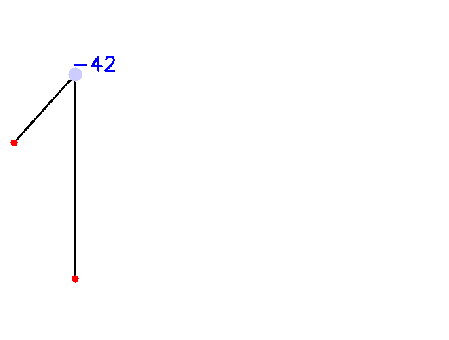

-41.98721249581667


In [10]:
frame_width = 480
frame_height = 640
frame = np.ones([480,640,3])
A = np.array([10,200])
B = np.array([100,400])
O = np.array([100,100])
showAngleImage(frame, A, B, O)
angle = getAngleLimited(A, B, O, allow_neg=True)
print(angle)

### Angle from cartesian coordinates showed graphically

Here the same logic is applied, but now instead of showing the result as an image, we plot it graphically. The input coordinates (Ac, Bc and Oc) are expressed as millimeters.

The function used to find the angle is the same used before because it was built to accept either pixel or cartesian coordinates.

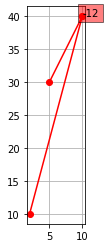

-11.633633998940438
-11.633633998940438


In [11]:
Ac = np.array([2,10])
Oc = np.array([10,40])
Bc = np.array([5,30])
showAnglePlot(Ac, Bc, Oc)
angle = getAngleLimited(Ac, Bc, Oc)
print(angle)
angle = getAngle(Ac, Bc, Oc)
print(angle)

### Conversion from cartesian coordinates to pixel representation

Here a conversion is applied to inform the three coordinates (Ac, Bc and Oc) with a cartesian representation and get the corresponding pixel coordinates and the angle between the segments. 

To convert from the pixel representation to cartesian coordinates (expressed as millimeters) we first need to know the millimeters per pixel proportion (mmpp) in the x and y coordinates, i.e how many millimeters does a single pixel corresponds to in each axis. 

The conversion function is:

\begin{eqnarray}
    j &=& round \left (\frac{x}{mmpp_x} \right) \\
    i &=& round \left (f_{height} - \frac{y}{mmpp_y} \right)
\end{eqnarray}

where $j$ is the column index and $i$ is the row index of the matrix representing the frame of the image. $f_{height}$ is the maximum frame height (i.e max number of rows considered). This is necessary because the rows (which are equivalent to the $y$ axis) increases downwards while the $y$ axis increases upwards, creating an inverse relationship between them that does not occur for the \textit{columns/x axis} case.

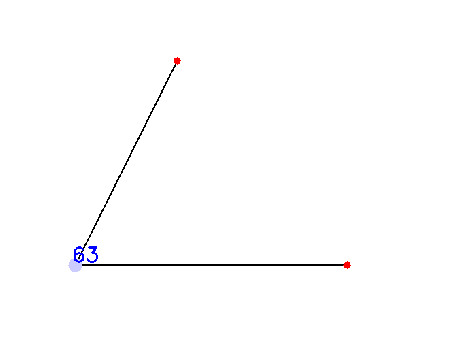

63.434948822922024


In [4]:
f_height = 480
f_width = 640
mmppx = 0.1
mmppy = 0.1
frame = np.ones([f_height,f_width,3])
Ac = np.array([25,40])
Bc = np.array([50,10])
Oc = np.array([10,10])
A = getPixel(Ac, f_height, mmppx, mmppy)
B = getPixel(Bc, f_height, mmppx, mmppy)
O = getPixel(Oc, f_height, mmppx, mmppy)
showAngleImage(frame, A, B, O)
angle = getAngleLimited(Ac, Bc, Oc)
print(angle)

### Conversion from pixel representation to cartesian coordinates

Conversely, here a conversion is applied to inform the three coordinates (A, B and O) with a pixel representation and get the corresponding cartesian coordinates and the angle between the segments. 

Similiarly, to convert from the cartesian representation to pixel coordinates ($ji$) we first need to know the millimeters per pixel proportion (mmpp) in the x and y coordinates, i.e how many millimeters does a single pixel corresponds to in each axis. 

The conversion function is:

\begin{eqnarray}
    x &=& j \cdot mmpp_x \\
    y &=& (f_{height} - i) \cdot mmpp_y
\end{eqnarray}

where $x$ is the horizontal axis value and $y$ is the vertical axis value. $f_{height}$ is the maximum frame height (i.e max number of rows considered). Again, this is necessary because the rows $i$ (which are equivalent to the $y$ axis) increases downwards while the $y$ axis increases upwards, creating an inverse relationship between them that does not occur for the \textit{columns/x axis} case.

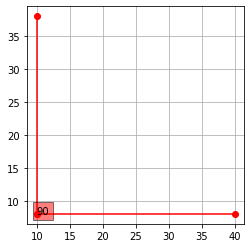

90.0


In [5]:
f_height = 480
A = np.array([100,100])
B = np.array([400,400])
O = np.array([100, 400])
Ac = getCoord(A, f_height, mmppx=0.1, mmppy=0.1)
Bc = getCoord(B, f_height, mmppx=0.1, mmppy=0.1)
Oc = getCoord(O, f_height, mmppx=0.1, mmppy=0.1)
showAnglePlot(Ac, Bc, Oc)
angle = getAngleLimited(Ac, Bc, Oc)
print(angle)

### <font color="red"> Problems</font>

1. We need to define $mmpp_y$ and $mmpp_x$ previously, requiring additional preparation
    - One possibility is to put a marker on the row, with known dimensions and use it as reference.
    - Another idea is to set an interface in the beggining to allow the user to select any area with known dimensions.

## Kinematic Model

The kinematic model used as basis for this project is the Master Motor Map Framework (MMM), which provides maximum angulation expected for each joint. From this model, we separated only the joints of interest for the rowing scenario.

###  Master Motor Map Framework (MMM)

|         MMM Model          |      Joints Constraints     |
|----------------------------|-----------------------------|
|![image](files/mmm_body.png)|![image](files/mmm_table.png)|

### Rowing Model

Simplifying the MMM model in the sagittal plane and selecting only the joints of interest, we get the following cases: 

- Sagittal Right Pose: Right Ankle (RA), Right Knee (RK), Right Hip (RH), Right Shoulder (RS), Right Elbow (RE) and Right Wrist (RW).

- Sagittal Left Pose: Left Ankle (RA), Left Knee (RK), Left Hip (RH), Left Shoulder (RS), Left Elbow (RE) and Left Wrist (RW).

But, considering the additional constraints added by the rowing movement, the angles were further limited resulting in the following model, described as a kinematic chain:

|     Rowing Model      |        |
:-------------------------:|:-------------------------:
![image](files/Rowing_model.png) | <style type="text/css"> .tg {border-collapse:collapse;border-spacing:0;} .tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;} .tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;} .tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top} .tg .tg-0lax{text-align:left;vertical-align:top} </style> <table class="tg"> <tr> <th class="tg-c3ow">Joint</th> <th class="tg-c3ow">Angle Limits</th> </tr> <tr> <td class="tg-c3ow">$\theta_0$</td> <td class="tg-c3ow">$[0^{\circ}, 135^{\circ}]$</td> </tr> <tr> <td class="tg-c3ow">$\theta_1$</td> <td class="tg-c3ow">$[0^{\circ}, 180^{\circ}]$</td> </tr> <tr> <td class="tg-0lax">$\theta_2$</td> <td class="tg-0lax">$[0^{\circ}, 180^{\circ}]$</td> </tr> <tr> <td class="tg-0lax">$\theta_3$</td> <td class="tg-0lax">$[-90^{\circ},120 ^{\circ}]$</td> </tr> <tr> <td class="tg-0lax">$\theta_4$</td> <td class="tg-0lax">$[0^{\circ}, 180^{\circ}]$</td> </tr> </table>

It is also worth noticing that the $d_3$ and $d_4$ segments aren't fixed in size, due to its moviment not being limited to the sagittal plane, resulting in a prismatic joint where the length varies as a function of time.

<font color="red"> Important: these joint angles were guessed, additional validation is required</font>

### <font color="red"> Problems</font>

1. The kinematic model needs information of the distances between joints
    - **Solution 1**: use first frame as a reference to get distances.
        - Advantages: doesn't need additional setup
        - Disadvantages: first frame is liable to measurement errors or even false negatives
    - **Solution 2**: demand known initial position (e.g arms straight at the beggining of the movement) and wait for the system to provide a good initial measure before starting.
        - Advantages: may provide more reliable joints distances than the first solution, guarantees the absence of false negatives
        - Disadvantages: is also liable to measurement errors and can take longer until system is ready (longer setup)
    - **Solution 3**: demand known initial position outside the ergometer row (e.g standing still) maximizing the likelihood of getting good joint estimates to be used as joint distances or at least for joints proportions.
        - Advantages: may provide more reliable joints distances than the first and second solution, also guarantees the absence of false negatives
        - Disadvantages: longer setup and, if used for joints distance directly, requires the pose to be in the same plane or as close as possible to the ergometer row plane, making it not much practical
    - **Solution 4**: Use only the most reliable joint distance (normally the hip to shoulder segment) and set the others with known proportions.
        - Advantages: doesn't require a good estimate on all joints segments only one
        - Disadvantages: requires knowledge of the proportions
    - **Solution 5** (personal favorite): Mix between solutions 4 and 5, where the proportion is set and stored for each person by capturing a standing still pose and this information is then used to estimate the joints distance. based on a measured reference (shoulder-hip segment) from the first frame. Because only the proportions will be stored, the plane considered for the standing still pose is not important. Also, for a fine tuning, the pose identified to get the proportions can be manually adjusted (with a quick interface) to improve the precision, if desired.
        - Advantages: should provide the best overall distance measures, robust to measurement errors and false negatives
        - Diadvantages: longest setup of all options


2. Because the pose is reconstructed starting from the ankle, its measure needs to be the best, otherwise the error will propagate.
    - **Solution 1**: trust the measure.
        - Advantages: the ankle joint tends to be well estimated. No setup required.
        - Diadvantages: although the ankle joint estimate tends to be classified in the ankle region, little variations inside this region (maybe due to discordance on where the point actually is) may propagate the error considerably, especially to the final joints (elbow and wrist)
    - **Solution 2**: select or correct the joint position in the initial setup (possibly together with the shoulder-hip joint definition) and consider it static during the rowing movement
        - Advantages: may provide better estimates than the first solution
        - Diadvantages: higher setup required and, most important, the ankle joint isn't static in the rowing movement because the foot hold is free in the lower extremity, making it possibly worst than the first actually
    - **Solution 3**: instead of using the ankle as the anchor for the kinematic model, use the toe (which is fixed in the foot hold) and set it, along with its distance to the ankle joint, in the initial configuration, adding another angle to estimate
        - Advantages: should provide the best estimates overall
        - Diadvantages: require additional setup and additional estimates, being susceptible to more measurement errors

### <font color="green"> Overall proposal</font>

An optional initial configuration step will be added, where every user can be registered with a standing still picture, which will be used to store his joint proportions and can be fine tuned manually from the interface. Then, at the beggining of the exercise, the user will be presented with the option to load any configuration file to be used as reference. 

The camera can also be calibrated initially, if desired, via a third party app with an interactive calibration process. Those first steps are only necessary once, assuming the camera is remained at the same position/environment, otherwise the process should be reapeated.

Before starting the exercise, another adjustment will be possible, where the anchor placement can be set alongside with the ankle initial position (through the interface).

All this options and its contributions should be evaluated from the experiments, but all the implemented solution could be available in the interface.

Even though the project goal is to make a low setup biomechanical analysis system, the sport scenario requires high data precision. Therefore, a resonable solution is to introduce additional setup options, where it is possible to improve precision as a trade-off with setup time. Moreover, this solution shouldn't prevent the system from being used in outdoor applications, which is also one of the main goals of the project.

## Inverse Kinematics

The calculation of the inverse kinematics is easier, because it can be done simply by taking the angle between every two adjacent segments. But, given the specificity of the considered angle for each case, this calculation depends on both the joint and the orientation (sagittal right or left) in question.

Therefore, the formula for the angle extraction goes as follow:

### Set keypoints example

First we separate an example of a rowing pose acquired from a video.

In [36]:
# Joints parameters
joint_names = ["Right Ankle", "Right Knee", "Right Hip", "Right Shoulder", "Right Elbow", "Right Wrist"]
joint_pairs = np.array([[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]])
keypoints = np.array([[309.0799294364889, 257.9850095323881], [237.54669086157156, 184.67854415301966], [129.60211926786423, 212.549560134363], [113.91245679876394, 104.33869973669145], [147.4302053610447, 154.58071676016732], [222.78538870226456, 162.36262676440668]])

# Frame parameters
frame_width = 512
frame_height = 352
frame = np.ones([frame_height,frame_width,3])

\textbf{Show pose as an image}

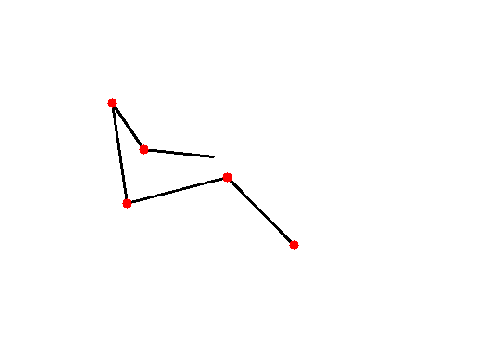

In [7]:
frame = np.ones([frame_height,frame_width,3])
showJointsImage(frame, keypoints, joint_pairs)

\textbf{Show joints graphically}

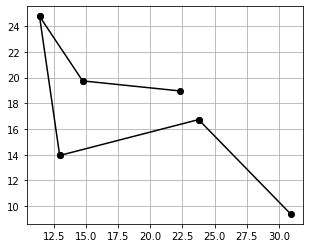

In [8]:
keypoints_xy = getKeypointsCoord(keypoints, frame_height, mmppx=0.1, mmppy=0.1)
showJointsPlot(keypoints_xy, joint_pairs)

### Apply inverse kinematics for a pixel representation

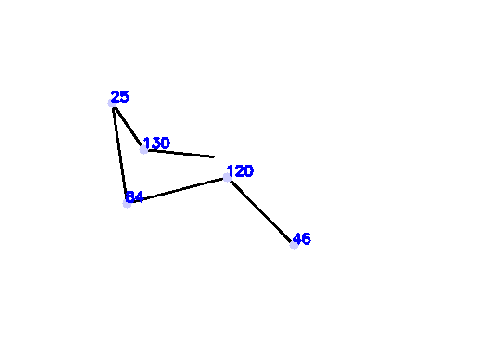

[ 45.70141911 119.82114462  83.77247786  25.45836384 129.60429772]


In [9]:
frame = np.ones([frame_height,frame_width,3])
showRowingChainAnglesImage(frame, keypoints)
angles = inverseKinematicsRowing(keypoints)
print(angles)

### Apply inverse kinematics for a cartesian representation

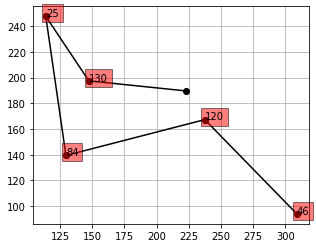

[ 45.70141911 119.82114462  83.77247786  25.45836384 129.60429772]


In [37]:
keypoints_xy = getKeypointsCoord(keypoints, frame_height, mmppx=1, mmppy=1)
showRowingChainAnglesPlot(keypoints_xy)
angles = inverseKinematicsRowing(keypoints_xy)
print(angles)

## Foward Kinematics

### Show bone dimensions from starting pose

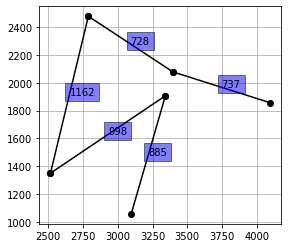

[ 885.37012928  997.63588837 1162.14883668  727.79502151  737.45218528]


In [11]:
# Joints order
joint_names = ["Right Ankle", "Right Knee", "Right Hip", "Right Shoulder", "Right Elbow", "Right Wrist"]
joint_pairs = np.array([[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]])

# Example acquired from a video
frame_width = 512
frame_height = 352
frame = np.ones([frame_height,frame_width,3])

keypoints = np.array([[309.6488458675051, 246.32102756240764], [334.27899739984014, 161.27893037653914], [251.541748018357, 217.0222817509081], [278.8293854281327, 104.05642836800503], [339.61156388205626, 144.08620123530085], [409.9074489250655, 166.37623940965867]])
keypoints_xy = getKeypointsCoord(keypoints, frame_height, mmppx=10, mmppy=10)
showRowingChainDistancesPlot(keypoints_xy)
distances = getBoneDimensions(keypoints_xy)
print(distances)

### Show angles and distances graphically

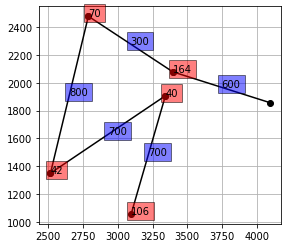

[106.1522348   39.87806035  42.45026727  70.21202826 164.22523889]
[ 885.37012928  997.63588837 1162.14883668  727.79502151  737.45218528]


In [14]:
showRowingChainAnglesDistancesPlot(keypoints_xy)
angles = inverseKinematicsRowing(keypoints_xy)
print(angles)
distances = getBoneDimensions(keypoints_xy)
print(distances)

### Set angles example

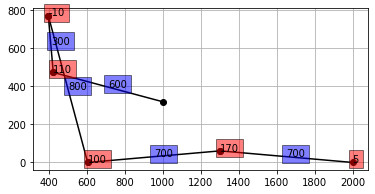

Distances: [700. 700. 800. 300. 600.]
Angles: [  5. 170. 100. -10. 110.]


In [38]:
root_xy = np.array([2000, 0])
distances = np.array([700, 700, 800, 300, 600])
angles = np.array([5, 170, 100, -10, 110])
keypointsFK_xy = fowardKinematicsRowing(root_xy, angles, distances)
showRowingChainAnglesDistancesPlot(keypointsFK_xy)
distances = getBoneDimensions(keypointsFK_xy)
angles = inverseKinematicsRowing(keypointsFK_xy)
print("Distances:", distances)
print("Angles:", angles)